<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/Support_Vector_Machine/1.01.Iris_Dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Dataset Preprocessing

In [2]:
# Using Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print("Target Names [0, 1, 2]:", iris['target_names'])
df['target'] = iris['target']

print(df['target'].unique())
df.head()

Target Names [0, 1, 2]: ['setosa' 'versicolor' 'virginica']
[0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
print("Row, Column:", df.shape)
print("Value Counts:")
df['target'].value_counts()

Row, Column: (150, 5)
Value Counts:


0    50
1    50
2    50
Name: target, dtype: int64

In [6]:
df['flower_name'] = df['target'].apply(lambda x: iris['target_names'][x])
print(df['flower_name'].unique())
df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

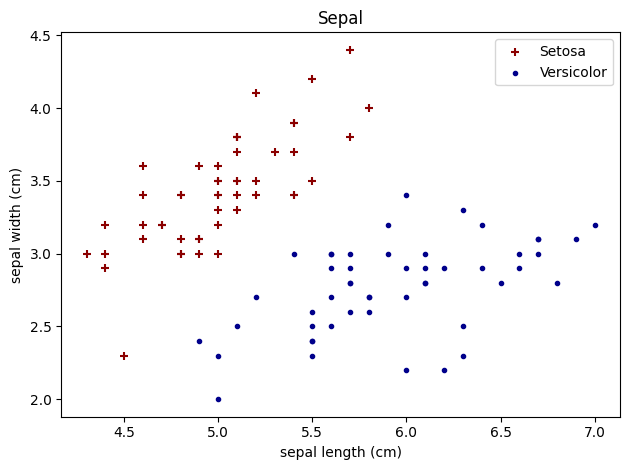

In [8]:
# Draw a scatter plot of sepal
plt.title("Sepal")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="darkred", marker="+", label="Setosa")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="darkblue", marker=".", label="Versicolor")

plt.legend()
plt.tight_layout()
plt.show()

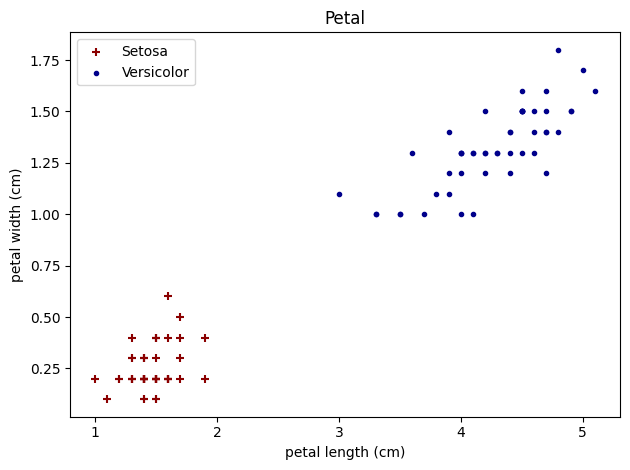

In [9]:
# Draw a scatter plot of petal
plt.title("Petal")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="darkred", marker="+", label="Setosa")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="darkblue", marker=".", label="Versicolor")

plt.legend()
plt.tight_layout()
plt.show()

## Using Support Vector Classifier

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['target', 'flower_name'], axis="columns")
y = df['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train))
print(len(X_test))

120
30


In [17]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [18]:
# Accuracy of the Model
model.score(X_test, y_test)

0.9

In [19]:
# Predict the flower
pre_value = {
    "sepal length (cm)": [3.1],
    "sepal width (cm)": [6.5],
    "petal length (cm)": [5.4],
    "petal width (cm)": [1.2]
}

result = model.predict(pd.DataFrame(pre_value))

if result == 0:
  print(result, "Setosa")
elif result == 1:
  print(result, "Versicolor")
else:
  print(result, "Virginica")

[1] Versicolor
